Задание 1

Есть А/Б тест направленный на конверсию в покупку (Курсы и репетиторы). % что-либо купивших в обоих группах одинаковый. Средний чек разный. Каким способом можно проверить, что разница не случайна (с использованием sql и/или python).
(А как принимать решение, если обе метрики разные?)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('dif_average_check - Лист1.csv')

In [ ]:
df.head()

,customer,purchase,check,group
0,1,1,60.0,test
1,2,1,100.0,test
2,3,0,NaN,test
3,4,1,69.0,test
4,5,0,NaN,test


In [ ]:
df.groupby('group').mean()[['purchase', 'check']]

,purchase,check
group,,
control,0.56,71.928571
test,0.56,73.428571


In [ ]:
df.dtypes

customer      int64
purchase      int64
check       float64
group        object
dtype: object

In [ ]:
df = df.fillna({'check':0})

In [ ]:
df_a = df[df.group == 'control']
df_b = df[df.group == 'test']

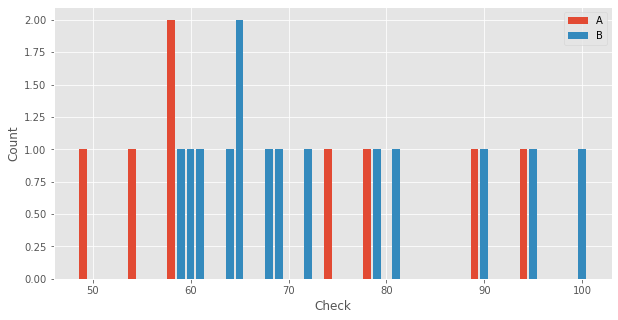

In [ ]:
for_a = df_a[df_a.purchase == 1].groupby('check').count()
for_b = df_b[df_b.purchase == 1].groupby('check').count()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(for_a.index, for_a['customer'], label = 'A')
ax.bar(for_b.index, for_b['customer'], label = 'B')

ax.set_ylabel('Count')
ax.set_xlabel('Check')
ax.legend()

<AxesSubplot:xlabel='group', ylabel='check'>

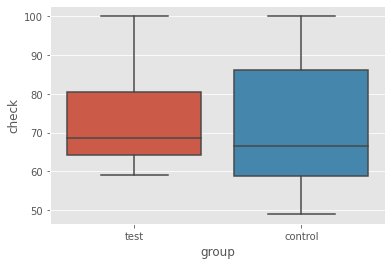

In [ ]:
sns.boxplot(x="group", y="check", data=df[df.purchase == 1])

In [ ]:
mannwhitneyu(df[df.group == 'test'].check,
             df[df.group == 'control'].check)

MannwhitneyuResult(statistic=326.0, pvalue=0.7919586045132309)

Видим, что p-value = 0.7919586045132309, следовательно, при уровне значимости = 0.05 мы принимаем нулевую гипотезу, которая гласит, что изменения случайны.


Если обе метрики разные, то нужно посмотреть на случайность результатов двух тестов для того, чтобы выбирать стратегию принятия решения: 

*   Если один из них случайный, то ориентируемся на вторую метрику: если  она дала прирост -> принимаем;
*   Если оба результата не случайные, то нужно смотреть на обе метрики или посмотреть на какую-то более общую, которая их объединяет;
*   Если оба случайные, то не выкатываем.